In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

In [2]:
def range_data(df, init_time, end_time):
    df['Time'] = pd.to_datetime(df['Time'], utc=True)
    return df[(df['Time'] >= pd.to_datetime(init_time)) & (df['Time'] <= pd.to_datetime(end_time))]


In [3]:
#Diversified time
init_time, end_time = '2022-09-27T06:01:00Z','2022-09-27T08:54:00Z'
d_error_ratio = pd.read_csv('/Users/francisco/Library/CloudStorage/OneDrive-Personal/Uni of Adelaide/Socialz/Socialz/Data/Rsults/Diversified/Error Ratios-data-as-seriestocolumns-2022-09-27 09 38 20.csv', skiprows=1)
d_memory_util = pd.read_csv('/Users/francisco/Library/CloudStorage/OneDrive-Personal/Uni of Adelaide/Socialz/Socialz/Data/Rsults/Diversified/Memory Utilization-data-2022-09-27 09 37 42.csv', skiprows=1)
d_rps = pd.read_csv('/Users/francisco/Library/CloudStorage/OneDrive-Personal/Uni of Adelaide/Socialz/Socialz/Data/Rsults/Diversified/RPS - Service Requests per Second-data-2022-09-27 09 39 19.csv', skiprows=1)
d_latency = pd.read_csv('/Users/francisco/Library/CloudStorage/OneDrive-Personal/Uni of Adelaide/Socialz/Socialz/Data/Rsults/Diversified/Workhorse Latency-data-as-seriestocolumns-2022-09-27 09 39 51.csv',skiprows=1)
d_saturation = pd.read_csv('/Users/francisco/Library/CloudStorage/OneDrive-Personal/Uni of Adelaide/Socialz/Socialz/Data/Rsults/Diversified/Saturation-data-as-seriestocolumns-2022-09-27 09 38 45.csv', skiprows=1)

d_error_ratio = range_data(d_error_ratio, init_time, end_time)
d_memory_util = range_data(d_memory_util, init_time, end_time)
d_rps = range_data(d_rps, init_time, end_time)
d_latency = range_data(d_latency, init_time, end_time)
d_saturation = range_data(d_saturation, init_time, end_time)

In [4]:
# Original time
init_time, end_time = '2022-09-27T11:13:00Z','2022-09-27T13:31:00Z'
n_error_ratio = pd.read_csv('/Users/francisco/Library/CloudStorage/OneDrive-Personal/Uni of Adelaide/Socialz/Socialz/Data/Rsults/Normal/Error Ratios-data-as-seriestocolumns-2022-09-27 15 18 49.csv',skiprows=1)
n_memory_util = pd.read_csv('/Users/francisco/Library/CloudStorage/OneDrive-Personal/Uni of Adelaide/Socialz/Socialz/Data/Rsults/Normal/Memory Utilization-data-2022-09-27 15 18 13.csv',skiprows=1)
n_rps = pd.read_csv('/Users/francisco/Library/CloudStorage/OneDrive-Personal/Uni of Adelaide/Socialz/Socialz/Data/Rsults/Normal/RPS - Service Requests per Second-data-2022-09-27 15 19 23.csv',skiprows=1)
n_latency = pd.read_csv('/Users/francisco/Library/CloudStorage/OneDrive-Personal/Uni of Adelaide/Socialz/Socialz/Data/Rsults/Normal/Workhorse Latency-data-as-seriestocolumns-2022-09-27 15 21 52.csv',skiprows=1)
n_saturation = pd.read_csv('/Users/francisco/Library/CloudStorage/OneDrive-Personal/Uni of Adelaide/Socialz/Socialz/Data/Rsults/Normal/Saturation-data-as-seriestocolumns-2022-09-27 15 21 00.csv', skiprows=1)

n_error_ratio = range_data(n_error_ratio, init_time, end_time)
n_memory_util = range_data(n_memory_util, init_time, end_time)
n_rps = range_data(n_rps, init_time, end_time)
n_latency = range_data(n_latency, init_time, end_time)
n_saturation = range_data(n_saturation, init_time, end_time)

In [5]:
n_latency

,Time,+Inf,0.005,0.025,0.1,0.5,1,10,30,300,60
68,2022-09-27 11:13:20+00:00,0.000,0,0.0000,0.00,0.00,0.00,0.000,0.000,0.000,0.000
69,2022-09-27 11:15:00+00:00,0.227,0,0.0267,0.12,0.20,0.20,0.227,0.227,0.227,0.227
70,2022-09-27 11:16:40+00:00,2.600,0,0.7000,1.89,2.52,2.60,2.600,2.600,2.600,2.600
71,2022-09-27 11:18:20+00:00,2.620,0,1.0700,1.98,2.58,2.62,2.620,2.620,2.620,2.620
72,2022-09-27 11:20:00+00:00,2.570,0,0.9200,1.95,2.52,2.57,2.570,2.570,2.570,2.570
...,...,...,...,...,...,...,...,...,...,...,...
146,2022-09-27 13:23:20+00:00,3.060,0,1.1800,2.64,3.04,3.06,3.060,3.060,3.060,3.060
147,2022-09-27 13:25:00+00:00,2.770,0,1.0000,2.32,2.76,2.77,2.770,2.770,2.770,2.770
148,2022-09-27 13:26:40+00:00,2.930,0,0.9780,2.58,2.93,2.93,2.930,2.930,2.930,2.930
149,2022-09-27 13:28:20+00:00,3.080,0,1.2400,2.73,3.08,3.08,3.080,3.080,3.080,3.080


In [113]:
error_ratio = pd.concat([n_error_ratio['postgres service'].describe(), d_error_ratio['postgres service'].describe()], axis=1)
error_ratio.columns= ['Original', 'Divirsified']
error_ratio

,Original,Divirsified
count,46.000000,58.000000
mean,0.000077,0.000142
std,0.000165,0.000228
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000313
max,0.000629,0.001140


<AxesSubplot:xlabel='postgres service', ylabel='Dataset'>

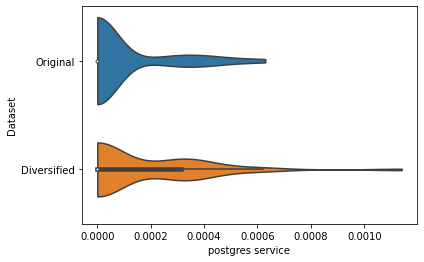

In [114]:
d_error_ratio.drop('gitlab-workhorse service',axis=1 ,inplace=True)
d_error_ratio['Dataset'] = 'Diversified'

n_error_ratio.drop('gitlab-workhorse service',axis=1 ,inplace=True)
n_error_ratio['Dataset'] = 'Original'

data = pd.concat([n_error_ratio, d_error_ratio])
sns.violinplot(x='postgres service', y='Dataset', data=data, cut=0)

In [115]:
stat, p_value = mannwhitneyu(n_error_ratio['postgres service'], d_error_ratio['postgres service'])
print(f'Mann–Whitney U Test: stat = {stat:.4f}, p-value = {p_value:.4f}')
print('Null hypothesis: the distribution of error ratio is the same in the original and diversified datasets.')
if p_value > 0.05:
    #'Same distribution (fail to reject H0)'
    print('Result: We do not reject the null hypothesis')
else:
    #'Different distribution, (reject H0)'
    print('Result: We reject the null hypothesis')

Mann–Whitney U Test: stat = 1141.5000, p-value = 0.1119
Null hypothesis: the distribution of error ratio is the same in the original and diversified datasets.
Result: We do not reject the null hypothesis


In [116]:
n_memory_util.columns = ['Time', 'Memory utilisation']
n_memory_util['Dataset'] = 'Original'

d_memory_util.columns = ['Time', 'Memory utilisation']
d_memory_util['Dataset'] = 'Diversified'

mem_util = pd.concat([n_memory_util['Memory utilisation'].describe(), d_memory_util['Memory utilisation'].describe()],axis=1)
mem_util.columns= ['Original', 'Divirsified']
mem_util

,Original,Divirsified
count,139.000000,174.000000
mean,0.774216,0.795167
std,0.013254,0.011598
min,0.708000,0.765000
25%,0.768000,0.789000
50%,0.775000,0.795000
75%,0.783000,0.804000
max,0.797000,0.824000


<AxesSubplot:xlabel='Memory utilisation', ylabel='Dataset'>

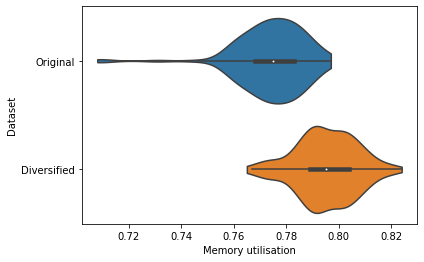

In [117]:
data = pd.concat([n_memory_util, d_memory_util])
sns.violinplot(x='Memory utilisation', y='Dataset', data=data, cut=0)

In [118]:
stat, p_value = mannwhitneyu(n_memory_util['Memory utilisation'], d_memory_util['Memory utilisation'])
print(f'Mann–Whitney U Test: stat = {stat:.4f}, p-value = {p_value:.4f}')
print('Null hypothesis: the distribution of memory utilization ratios is the same in the original and diversified datasets.')
if p_value > 0.05:
    #'Same distribution (fail to reject H0)'
    print('Result: We do not reject the null hypothesis')
else:
    #'Different distribution, (reject H0)'
    print('Result: We reject the null hypothesis')

Mann–Whitney U Test: stat = 2373.0000, p-value = 0.0000
Null hypothesis: the distribution of memory utilization ratios is the same in the original and diversified datasets.
Result: We reject the null hypothesis


In [119]:
n_rps.columns = ['Time', 'RPS']
d_rps.columns = ['Time', 'RPS']
rps = pd.concat([n_rps['RPS'].describe(), d_rps['RPS'].describe()],axis=1)
rps.columns= ['Original', 'Divirsified']
rps

,Original,Divirsified
count,46.000000,58.000000
mean,1.800587,1.623379
std,1.089304,0.953270
min,0.000000,0.467000
25%,1.315000,1.105000
50%,1.515000,1.345000
75%,1.800000,1.630000
max,5.360000,5.210000


<AxesSubplot:xlabel='RPS', ylabel='Dataset'>

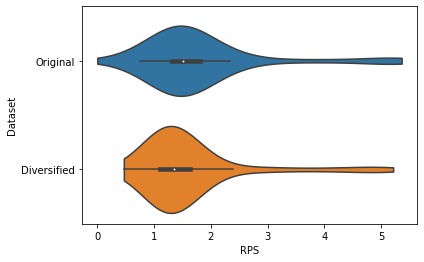

In [120]:
n_rps['Dataset'] = 'Original'
d_rps['Dataset'] = 'Diversified'
data = pd.concat([n_rps, d_rps])
sns.violinplot(x='RPS', y='Dataset', data=data, cut=0)

In [121]:
stat, p_value = mannwhitneyu(n_rps['RPS'], d_rps['RPS'])
print(f'Mann–Whitney U Test: stat = {stat:.4f}, p-value = {p_value:.4f}')
print('Null hypothesis: the distribution of requests per second is the same in the original and diversified datasets.')
if p_value > 0.05:
    #'Same distribution (fail to reject H0)'
    print('Result: We do not reject the null hypothesis')
else:
    #'Different distribution, (reject H0)'
    print('Result: We reject the null hypothesis')

Mann–Whitney U Test: stat = 1609.5000, p-value = 0.0718
Null hypothesis: the distribution of requests per second is the same in the original and diversified datasets.
Result: We do not reject the null hypothesis


In [194]:
n_latency.drop([68], inplace=True)

In [195]:
n_latency = n_latency[['Time','0.005','0.025','0.1','0.5','1','10','30','60','300','+Inf']]
n_latency.describe()

,0.005,0.025,0.1,0.5,1,10,30,60,300,+Inf
count,82.0,82.000000,82.000000,82.000000,82.000000,82.00000,82.00000,82.00000,82.00000,82.00000
mean,0.0,1.224118,2.775610,3.184024,3.201951,3.20228,3.20228,3.20228,3.20228,3.20228
std,0.0,0.994477,1.177669,1.148594,1.141373,1.14050,1.14050,1.14050,1.14050,1.14050
min,0.0,0.026700,0.120000,0.200000,0.200000,0.22700,0.22700,0.22700,0.22700,0.22700
25%,0.0,0.689000,2.210000,2.615000,2.642500,2.64250,2.64250,2.64250,2.64250,2.64250
50%,0.0,0.940000,2.445000,2.820000,2.840000,2.84000,2.84000,2.84000,2.84000,2.84000
75%,0.0,1.262500,2.870000,3.287500,3.287500,3.28750,3.28750,3.28750,3.28750,3.28750
max,0.0,5.240000,7.230000,7.610000,7.610000,7.61000,7.61000,7.61000,7.61000,7.61000


In [196]:
d_latency = d_latency[['Time','0.005','0.025','0.1','0.5','1','10','30','60','300','+Inf']]
d_latency.describe()

,0.005,0.025,0.1,0.5,1,10,30,60,300,+Inf
count,109.0,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.0,0.883902,2.409908,2.816972,2.836697,2.836697,2.836697,2.836697,2.836697,2.836697
std,0.0,0.960912,1.200956,1.166720,1.160524,1.160524,1.160524,1.160524,1.160524,1.160524
min,0.0,0.083300,1.080000,1.580000,1.580000,1.580000,1.580000,1.580000,1.580000,1.580000
25%,0.0,0.267000,1.470000,1.900000,1.930000,1.930000,1.930000,1.930000,1.930000,1.930000
50%,0.0,0.683000,2.280000,2.680000,2.720000,2.720000,2.720000,2.720000,2.720000,2.720000
75%,0.0,0.933000,2.630000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,0.0,4.630000,6.600000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


<AxesSubplot:xlabel='variable', ylabel='value'>

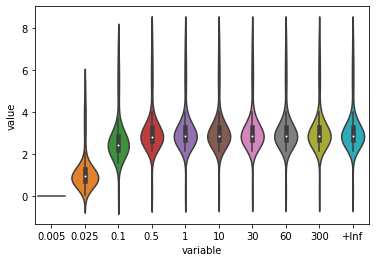

In [197]:
#Stack the columns of the summary:
n_latency = pd.melt(n_latency, id_vars=['Time'], value_vars=['0.005','0.025','0.1','0.5','1','10','30','60','300','+Inf'])
sns.violinplot(x='variable', y='value', data=n_latency)

<AxesSubplot:xlabel='variable', ylabel='value'>

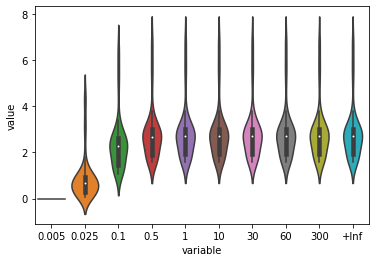

In [198]:
d_latency = pd.melt(d_latency, id_vars=['Time'], value_vars=['0.005','0.025','0.1','0.5','1','10','30','60','300','+Inf'])
sns.violinplot(x='variable', y='value', data=d_latency)

In [201]:
buckets = ['0.005','0.025','0.1','0.5','1','10','30','60','300','+Inf']

for bucket in buckets:

    stat, p_value = mannwhitneyu(n_latency[n_latency['variable']==bucket]['value'], d_latency[d_latency['variable']==bucket]['value'])
    print(f'Mann–Whitney U Test: stat = {stat:.4f}, p-value = {p_value:.4f}')
    print(f'Null hypothesis: the distribution of {bucket} latency is the same in the original and diversified datasets.')
    if p_value > 0.05:
        #'Same distribution (fail to reject H0)'
        print('Result: We do not reject the null hypothesis')
    else:
        #'Different distribution, (reject H0)'
        print('Result: We reject the null hypothesis')
    print('\n')



Mann–Whitney U Test: stat = 4469.0000, p-value = 1.0000
Null hypothesis: the distribution of 0.005 latency is the same in the original and diversified datasets.
Result: We do not reject the null hypothesis


Mann–Whitney U Test: stat = 6166.5000, p-value = 0.0000
Null hypothesis: the distribution of 0.025 latency is the same in the original and diversified datasets.
Result: We reject the null hypothesis


Mann–Whitney U Test: stat = 5666.5000, p-value = 0.0015
Null hypothesis: the distribution of 0.1 latency is the same in the original and diversified datasets.
Result: We reject the null hypothesis


Mann–Whitney U Test: stat = 5720.0000, p-value = 0.0009
Null hypothesis: the distribution of 0.5 latency is the same in the original and diversified datasets.
Result: We reject the null hypothesis


Mann–Whitney U Test: stat = 5747.5000, p-value = 0.0007
Null hypothesis: the distribution of 1 latency is the same in the original and diversified datasets.
Result: We reject the null hypothesi

In [10]:
n_saturation.describe()

,active_db_connections saturation,cpu saturation,disk_space saturation,memory saturation,open_fds saturation,open_ruby_fds saturation,redis_clients saturation,single_node_cpu saturation,single_threaded_cpu saturation
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.062439,0.692065,0.602065,0.816891,0.006274,0.004210,0.007483,0.692065,0.008121
std,0.013272,0.023652,0.002917,0.015246,0.001299,0.000805,0.000449,0.023652,0.000548
min,0.027800,0.640000,0.597000,0.748000,0.001330,0.003180,0.006900,0.640000,0.006550
25%,0.058800,0.677000,0.600000,0.809250,0.005380,0.003600,0.007200,0.677000,0.007785
50%,0.062500,0.685500,0.602000,0.818500,0.006330,0.003960,0.007300,0.685500,0.008065
75%,0.071400,0.703750,0.604000,0.826750,0.007080,0.004695,0.007575,0.703750,0.008550
max,0.100000,0.751000,0.607000,0.840000,0.009130,0.006080,0.008800,0.751000,0.009130


In [11]:
d_saturation.describe()

,active_db_connections saturation,cpu saturation,disk_space saturation,memory saturation,open_fds saturation,open_ruby_fds saturation,redis_clients saturation,single_node_cpu saturation,single_threaded_cpu saturation
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.070210,0.703293,0.585810,0.844483,0.006173,0.003288,0.007548,0.703293,0.008120
std,0.027904,0.023209,0.004792,0.011483,0.001139,0.000719,0.000534,0.023209,0.000722
min,0.033300,0.673000,0.579000,0.815000,0.001070,0.002260,0.007000,0.673000,0.006420
25%,0.058800,0.690000,0.582000,0.839000,0.005530,0.002820,0.007200,0.690000,0.007755
50%,0.066700,0.699000,0.584000,0.846000,0.006130,0.003030,0.007300,0.699000,0.007970
75%,0.071400,0.708750,0.589000,0.852000,0.006730,0.003605,0.007675,0.708750,0.008465
max,0.154000,0.816000,0.596000,0.864000,0.008930,0.005520,0.009000,0.816000,0.010300


/var/folders/3k/tk51r55962751zt89q_rcgfw0000gn/T/ipykernel_1518/1495091194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_cpu_saturation['Dataset'] = 'Original'
/var/folders/3k/tk51r55962751zt89q_rcgfw0000gn/T/ipykernel_1518/1495091194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpu_saturation['Dataset'] = 'Diversified'


<AxesSubplot:xlabel='cpu saturation', ylabel='Dataset'>

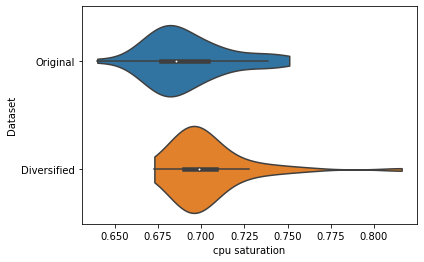

In [13]:
n_cpu_saturation = n_saturation[['Time', 'cpu saturation']]
n_cpu_saturation['Dataset'] = 'Original'

d_cpu_saturation = d_saturation[['Time', 'cpu saturation']]
d_cpu_saturation['Dataset'] = 'Diversified'

data = pd.concat([n_cpu_saturation, d_cpu_saturation])
sns.violinplot(x='cpu saturation', y='Dataset', data=data, cut=0)

In [14]:
stat, p_value = mannwhitneyu(n_cpu_saturation['cpu saturation'], d_cpu_saturation['cpu saturation'])
print(f'Mann–Whitney U Test: stat = {stat:.4f}, p-value = {p_value:.4f}')
print('Null hypothesis: the distribution of cpu saturation ratio is the same in the original and diversified datasets.')
if p_value > 0.05:
    #'Same distribution (fail to reject H0)'
    print('Result: We do not reject the null hypothesis')
else:
    #'Different distribution, (reject H0)'
    print('Result: We reject the null hypothesis')

Mann–Whitney U Test: stat = 862.0000, p-value = 0.0020
Null hypothesis: the distribution of cpu saturation ratio is the same in the original and diversified datasets.
Result: We reject the null hypothesis


In [16]:
cpu_saturation = pd.concat([n_cpu_saturation['cpu saturation'].describe(), d_cpu_saturation['cpu saturation'].describe()],axis=1)
cpu_saturation.columns = ['Original', 'Diversified']
cpu_saturation

,Original,Diversified
count,46.000000,58.000000
mean,0.692065,0.703293
std,0.023652,0.023209
min,0.640000,0.673000
25%,0.677000,0.690000
50%,0.685500,0.699000
75%,0.703750,0.708750
max,0.751000,0.816000
